# Calorie-Expenditure Prediction

In [85]:
# Libraries 
import pandas as pd 
import rtoml
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Config
with open("pyproject.toml","r",encoding="utf-8") as f:
    toml = rtoml.load(f)

# Data
train = pd.read_csv(toml["config"]["train"])
test = pd.read_csv(toml["config"]["test"])
sample = pd.read_csv(toml["config"]["sample"])

## 1. EDA

### 1.1 First look

1. Train es el conjunto para el entrenamiento del modelo
2. Test es el conjunto para evaluar las prestaciones de los modelos, no contiene el target
3. Sample contiene los targets para Test, se puede hacer un "Join" por id

In [ ]:
# Join between test and sample
test = pd.merge(test, sample, on="id")

In [12]:
# Visualization of a few rows observations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


**Variables**:<br>
| NOMBRE | DESCRIPCION  | TIPO | NULOS | CAMBIAR TIPO | 
|------------|--------------|--------------|--------------|------------|
| id | Identificator of the subject | int | NO |  NO |
| sexo | Subject's sex | bin | NO | YES |
| Age | Subject's age (years) | int | NO | NO |
| Height | Subject's height (cm) | float | NO | NO |
| Weight | Subject's weight (kg) | float | NO | NO |
| Duration | Exercice duration (min) | float | NO | NO |
| Heart_Rate | Subject's heart rate (lpm) | float | NO | NO |
| Body_Temp | Subject's boty temperature (ºC) | float | NO | NO |
| Calories | Burnt calories (target) | float | NO | NO |






In [24]:
# Informacion extra
print("Number of rows in train:   ",train.shape[0])
print("Number of rows in test:    ",test.shape[0])
print("Number of features:        ",train.shape[1]-1)

Number of rows in train:    750000
Number of rows in test:     250000
Number of features:         8


In [23]:
# Some observations
train.sample(10)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
248676,248676,male,51,201.0,100.0,22.0,100.0,40.6,139.0
339307,339307,female,74,156.0,56.0,20.0,105.0,40.7,135.0
352967,352967,female,48,160.0,60.0,23.0,101.0,40.5,135.0
693440,693440,male,63,199.0,106.0,26.0,112.0,40.9,229.0
124929,124929,male,34,192.0,89.0,13.0,96.0,40.1,64.0
422409,422409,male,51,186.0,87.0,19.0,94.0,40.7,103.0
576405,576405,male,20,193.0,91.0,13.0,91.0,40.1,44.0
327848,327848,female,30,161.0,61.0,30.0,102.0,40.5,181.0
432440,432440,male,43,184.0,86.0,6.0,89.0,39.6,24.0
342358,342358,male,66,179.0,87.0,27.0,101.0,41.0,202.0


In [27]:
train.drop(columns=["id"]).describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In general, all features are within a reasonable range of values. The only weird thing is that the minimum weight is 36 kg, which, taking into consideration that the minimum age is 20 years old, is way too low. However, the minimum height is 126 cm, so maybe there are subjects with achondroplasia. If I’m right, there shouldn’t be any problems with the data, so I’ll work with the dataset ignoring these facts.

### 1.2 Correlations

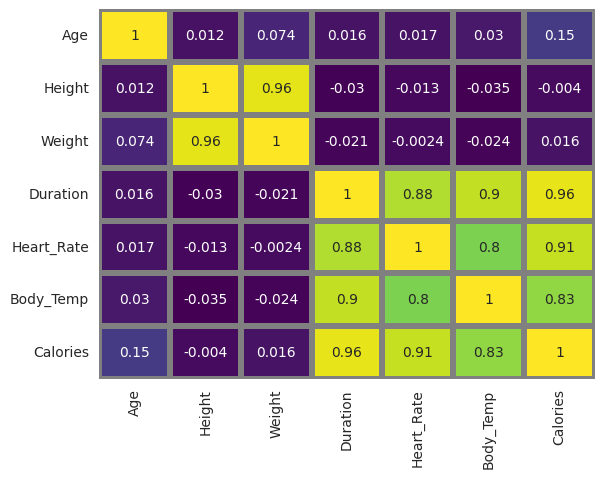

In [89]:
# Correlation matrix
corr_matrix = train.drop(columns=["id","Sex"]).corr() 

# Plot
sns.heatmap(corr_matrix, annot=True, cmap="viridis", linewidths=4, cbar=False,linecolor="gray")
plt.show()

**-- POR AQUI --**

### 1.3 Boxplots